In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate as integrate
from scipy.stats import norm as normal

# Binary choice model

We consider a simple binary choice model, with the following utility functions:
- Alternative 1: $V_1 = 0$  
- Alternative 2: $V_2 = -\beta x + 2 M$, where $M$ is 1 if the individual is male, 0 otherwise. 
The exact value of $\beta$ is not known. It is known to be distributed across the population, with a different distribution for men and women.

Men: $\beta \sim N(-3, 2^2)$

In [2]:
mean_male = -3
scale_male = 2 

Women: $\beta \sim N(-1, 3^2)$

In [3]:
mean_female = -1
scale_female = 3 

We first plot the two distributions

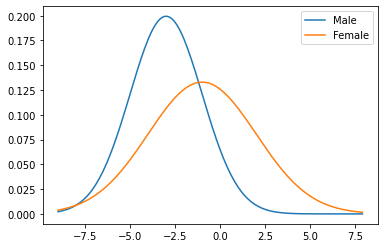

In [4]:
beta_rng = np.arange(-9, 8, 0.1)

ym = normal.pdf(beta_rng, loc=mean_male, scale=scale_male)
plt.plot(beta_rng, ym, label='Male')

yf = normal.pdf(beta_rng, loc=mean_female, scale=scale_female)
plt.plot(beta_rng, yf, label='Female')

plt.legend()
plt.show()

The following function calculates the choice probability of alternative 1 if both $\beta$ and $M$ are known. It is a binary logit model:
$$
P(1; \beta, M) = \frac{1}{1 + e^{-\beta x + 2M}}
$$

In [5]:
def condprob(beta, x, male=True):
    cte = 2 if male else 0
    V = -beta * x + cte
    return 1 / (1 + np.exp(V))


The following functions calculate the choice probability for each gender category:
$$
P(1; M) = \int_{\beta=-\infty}^{+\infty }\frac{1}{1 + e^{-\beta x + 2M}} f_M(\beta) d\beta,
$$
where $f_M$ is the pdf of the normal distribution associated with the known gender.

We first implement the integrands for each gender category.

In [6]:
def integrand_male(beta, x):
    return (condprob(beta, x, male=True) * 
            normal.pdf(beta, loc=mean_male, scale=scale_male))

In [7]:
def integrand_female(beta, x):
    return (condprob(beta, x, male=False) * 
            normal.pdf(beta, loc=mean_female, scale=scale_female))

Then we integrate to obtain the choice probability.

In [8]:
def prob_male(x):
    return integrate.quad(integrand_male, 
                          -np.inf, 
                          +np.inf, 
                          args=x)[0]

In [9]:
def prob_female(x):
    return integrate.quad(integrand_female, 
                          -np.inf, 
                          +np.inf, 
                          args=x)[0]

The following function calculates the choice probability when the gender of the individual is not known. In that case, the 

In [10]:
def prob_unknown(x):
    return 0.5 * prob_male(x) + 0.5 * prob_female(x)

In order to emphasize the importance of the mixtures, we  compare
the choice probability provided by the mixtures of logit, with the one
where $\beta$ is assumed to be fixed at its mean value, that is $-3$ for
men, and $-1$ for women.

In [11]:
def prob_mean_male(x):
    return condprob(mean_male, x, male=True)

In [12]:
def prob_mean_female(x):
    return condprob(mean_female, x, male=False)

In [13]:
def prob_mean_unknown(x):
    return 0.5 * prob_mean_male(x) + 0.5 * prob_mean_female(x)

We now plot the choice probability as a function of the variable $x$.
In the following plot, each column corresponds to a category of individuals:
- men,
- women,
- gender unknown.

The first row plots the probability taking into account the distributions of $\beta$. The second row plots the probability calculated at the mean value. 

In [14]:
row1 = [prob_male, prob_female, prob_unknown]
row2 = [prob_mean_male, prob_mean_female, prob_mean_unknown]
titles = ['Male', 'Female', 'Unknown']

In [15]:
x = np.arange(0, 2, 0.001)
def displayrow(row, axes):
    for i, r in enumerate(row):
        y = np.vectorize(r)(x)
        axes[i].axis([0, 2, 0, 0.5])
        axes[i].plot(x, y)
        axes[i].set(xlabel='x', ylabel='P(2)')

<ipython-input-5-f189784b31e4>:4: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(V))
<ipython-input-5-f189784b31e4>:4: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(V))
<ipython-input-5-f189784b31e4>:4: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(V))


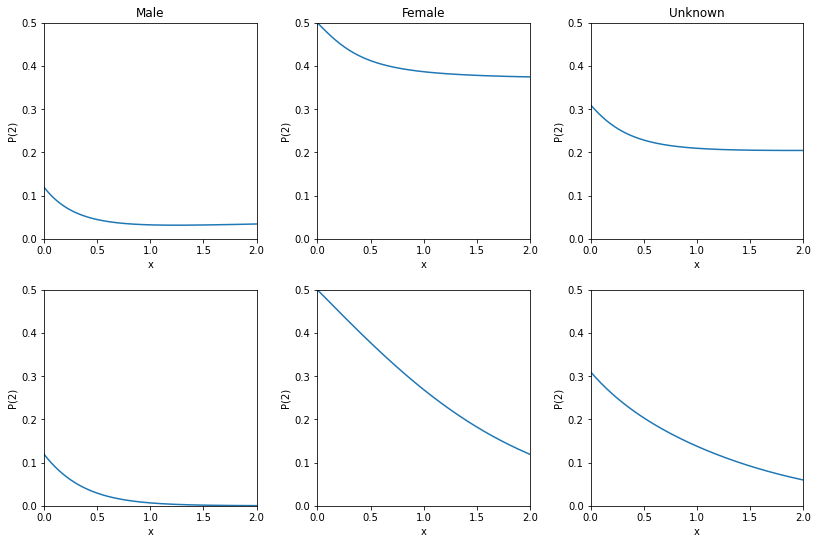

In [16]:
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
for i, t in enumerate(titles):
    axes[0,i].set_title(t)
axes[0, 0].set_ylabel('Distributed')
axes[1, 0].set_ylabel('Mean')
fig.tight_layout(pad=3.0)
displayrow(row1, axes[0,:])
displayrow(row2, axes[1,:])

The above results show the importance of taking into account the distribution of the parameter. 